In [26]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize



In [42]:
p1 = [] 
error = [1,0.001]
csv = ["P1_20cm.csv", "P1_30cm.csv", "P1_40cm.csv"]
for i in range(3):
    run = []
    for j in range(2):  
        collumn = np.genfromtxt(csv[j], delimiter=",", usecols=(j), skip_header=1)
        collumn = unumpy.uarray(collumn, std_devs = error[j])
        if j == 0 :
            frequncy = 299792458 / (collumn*(10**(-9))) # c = 299792458 m/s, frequency = c/lambda
            run.append(frequncy)
        else : run.append(collumn*(-1))
    p1.append(run)
    
# [3 runs][wavelength (m), stopping potential (V)] 
#print(p1)



[ 4.17151828e-15 -1.61906626e+00] [2.51156673e-16 1.69107909e-01]
------------------------------
Chi Square value:
12337.238857517126
Expected value
4
Minimum Chi-Square for a good fit
-1.6568542494923806
Maximum Chi-Square for a good fit
9.65685424949238
Doubtful minimum Chi-Square for a good fit
-4.485281374238571
Doubtful maximum Chi-Square for a good fit
12.485281374238571
------------------------------


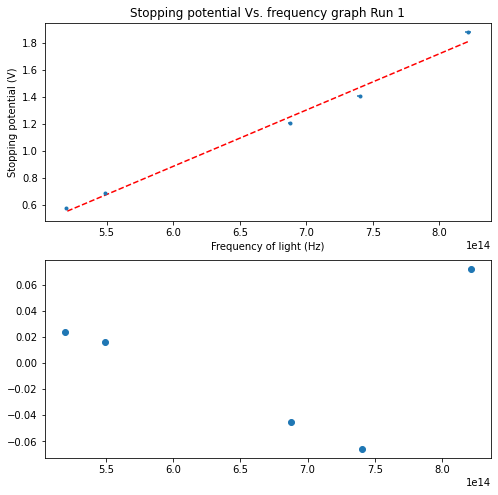

[ 4.17151828e-15 -1.61906626e+00] [2.51156673e-16 1.69107909e-01]
------------------------------
Chi Square value:
12337.238857517126
Expected value
4
Minimum Chi-Square for a good fit
-1.6568542494923806
Maximum Chi-Square for a good fit
9.65685424949238
Doubtful minimum Chi-Square for a good fit
-4.485281374238571
Doubtful maximum Chi-Square for a good fit
12.485281374238571
------------------------------


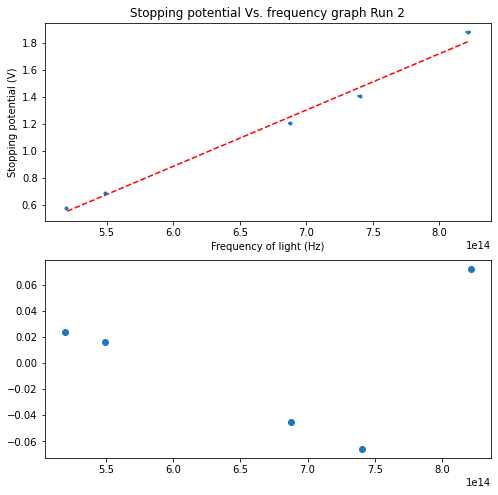

[ 4.17151828e-15 -1.61906626e+00] [2.51156673e-16 1.69107909e-01]
------------------------------
Chi Square value:
12337.238857517126
Expected value
4
Minimum Chi-Square for a good fit
-1.6568542494923806
Maximum Chi-Square for a good fit
9.65685424949238
Doubtful minimum Chi-Square for a good fit
-4.485281374238571
Doubtful maximum Chi-Square for a good fit
12.485281374238571
------------------------------


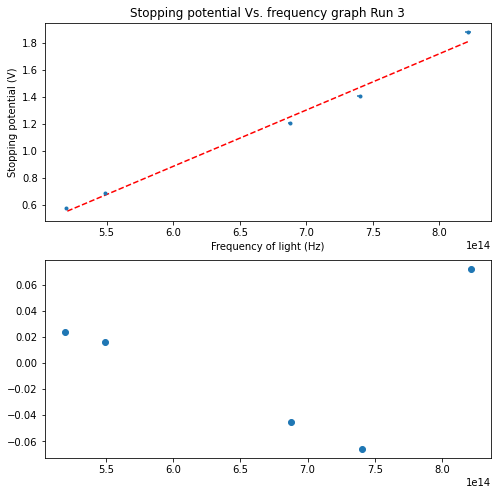

In [43]:
title = ["Run 1", "Run 2", "Run 3"]
for i in range(3):
    plt.figure(figsize=(8, 8))
    plt.subplot(2,1,1)

    x = p1[i][0] # frequency  
    y = p1[i][1] # stopping potential 


    plt.errorbar(unumpy.nominal_values(x), unumpy.nominal_values(y),xerr= unumpy.std_devs(x),yerr= unumpy.std_devs(y), fmt=".", label = 'Data')
    
    def f(x,a, b):
        return a*x + b 
    popt,pcov = optimize.curve_fit(f,xdata=unumpy.nominal_values(x), ydata=unumpy.nominal_values(y), sigma=unumpy.std_devs(y)) 
    perr = np.sqrt(np.diag(pcov))
    print(popt, perr)
    
    def fit(x):
        return popt[0]*x+popt[1]

    plt.plot(unumpy.nominal_values(x), fit(unumpy.nominal_values(x)), 'r--',label='Linear fit')

    plt.xlabel("Frequency of light (Hz)")
    plt.ylabel("Stopping potential (V)")
    plt.title("Stopping potential Vs. frequency graph "+title[i])

    plt.subplot(2,1,2)
    plt.plot(unumpy.nominal_values(x), (unumpy.nominal_values(y))-(fit(unumpy.nominal_values(x))), 'o')

    print('-'*30)

    f_degree = len(x)-1
    print('Chi Square value:')
    print(sum( ( (unumpy.nominal_values(y)-(fit(unumpy.nominal_values(x)))) / unumpy.std_devs(y))**2 ) )
    print('Expected value')
    print(f_degree)
    print('Minimum Chi-Square for a good fit')
    print(f_degree - 2* (2*f_degree)**0.5)
    print('Maximum Chi-Square for a good fit')
    print(f_degree + 2* (2*f_degree)**0.5)

    print('Doubtful minimum Chi-Square for a good fit')
    print(f_degree - 3* (2*f_degree)**0.5)
    print('Doubtful maximum Chi-Square for a good fit')
    print(f_degree + 3* (2*f_degree)**0.5)
    print('-'*30)

    plt.show()
